In [2]:
    !pip install -q gdown

In [3]:
import gdown

url = "https://drive.google.com/drive/folders/1autfP6l9Gbq_eEf-AibsHzJ_Olih_Ewd"
gdown.download_folder(url)

Retrieving folder contents


Processing file 1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ GreenBackground.png
Processing file 1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w NewBackground.jpg
Processing file 1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07 Object.png


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ
To: /home/minhhuy/Documents/self_study/Course/AI24/AIO_Exercises/Module 2/Week 2/Image data/GreenBackground.png
100%|██████████| 5.51k/5.51k [00:00<00:00, 2.77MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w
To: /home/minhhuy/Documents/self_study/Course/AI24/AIO_Exercises/Module 2/Week 2/Image data/NewBackground.jpg
100%|██████████| 64.3k/64.3k [00:00<00:00, 402kB/s]
Downloading...
From: https://drive.google.com/uc?id=1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07
To: /home/minhhuy/Documents/self_study/Course/AI24/AIO_Exercises/Module 2/Week 2/Image data/Object.png
100%|██████████| 51.0k/51.0k [00:00<00:00, 355kB/s]
Download completed


['/home/minhhuy/Documents/self_study/Course/AI24/AIO_Exercises/Module 2/Week 2/Image data/GreenBackground.png',
 '/home/minhhuy/Documents/self_study/Course/AI24/AIO_Exercises/Module 2/Week 2/Image data/NewBackground.jpg',
 '/home/minhhuy/Documents/self_study/Course/AI24/AIO_Exercises/Module 2/Week 2/Image data/Object.png']

## a. Resize các ảnh đầu vào về cùng kích thước

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

bg1_image = cv2.imread('./Image data/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('./Image data/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('./Image data/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

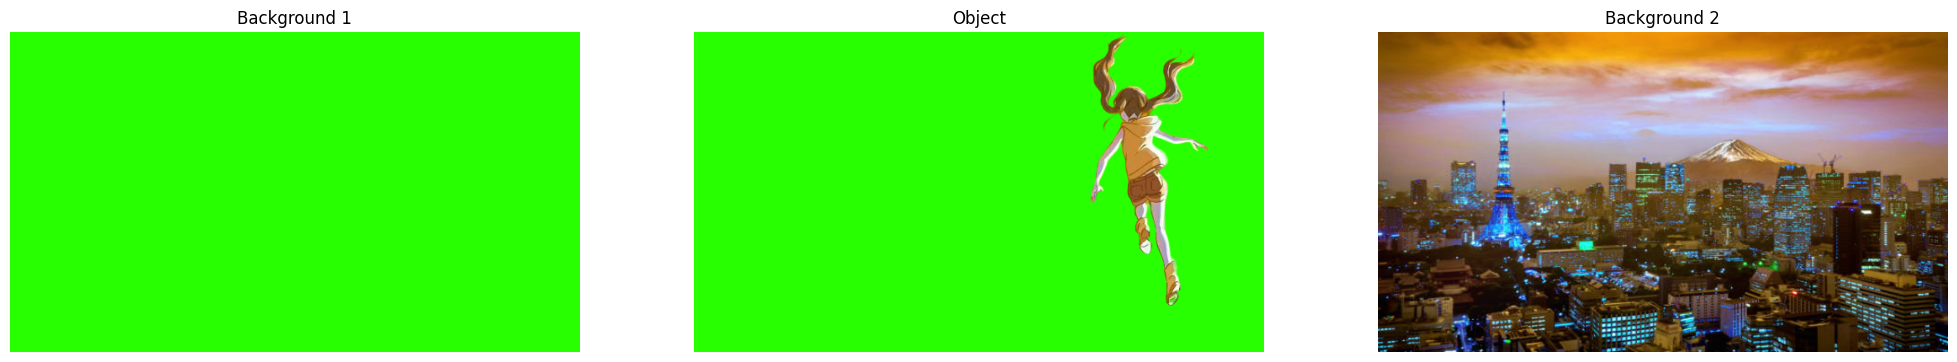

In [5]:
plt.figure(figsize=(25, 10))

# Plot the first image
plt.subplot(1, 3, 1)
plt.imshow(bg1_image)
plt.title('Background 1')
plt.axis('off')

# Plot the second image
plt.subplot(1, 3, 2)
plt.imshow(ob_image)
plt.title('Object')
plt.axis('off')

# Plot the third image
plt.subplot(1, 3, 3)
plt.imshow(bg2_image)
plt.title('Background 2')
plt.axis('off')

# Display the figure with the subplots
plt.show()

## b. Xây dựng hàm compute_difference()

In [6]:
def compute_difference(bg_img, input_img):
    difference = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference, axis=2) / 3
    return difference_single_channel

(np.float64(-0.5), np.float64(677.5), np.float64(380.5), np.float64(-0.5))

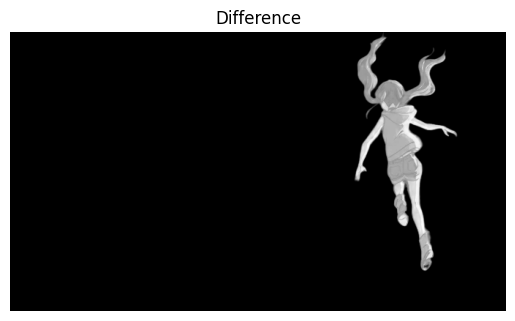

In [8]:
difference_single_channel = compute_difference(bg1_image, ob_image)

plt.imshow(difference_single_channel, cmap='gray')
plt.title('Difference')
plt.axis('off')

## c. Xây dựng hàm compute_binary_mask()

In [14]:
def compute_binary_mask(difference_single_channel):
    _, difference_binary = cv2.threshold(difference_single_channel, 15, 255, cv2.THRESH_BINARY)
    difference_binary = np.stack((difference_binary,) * 3, axis=-1)
    return difference_binary

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


(np.float64(-0.5), np.float64(677.5), np.float64(380.5), np.float64(-0.5))

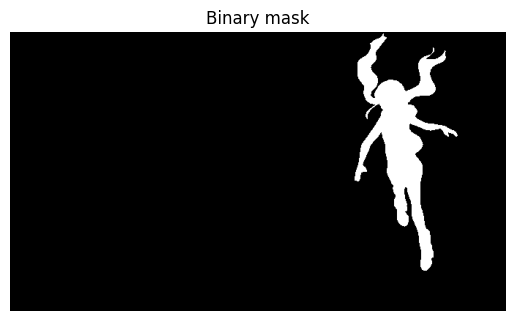

In [15]:
binary_mask = compute_binary_mask(difference_single_channel)

plt.imshow(binary_mask, cmap='gray')
plt.title('Binary mask')
plt.axis('off')

## d. Xây dựng hàm replace_background()

In [16]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    
    binary_mask = compute_binary_mask(difference_single_channel)
    
    output = np.where(binary_mask==255, ob_image, bg2_image)
    
    return output

(np.float64(-0.5), np.float64(677.5), np.float64(380.5), np.float64(-0.5))

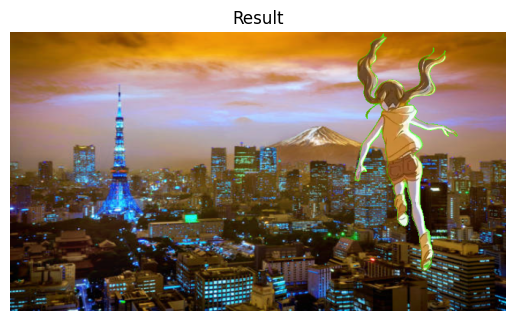

In [17]:
result = replace_background(bg1_image, bg2_image, ob_image)

plt.imshow(result)
plt.title('Result')
plt.axis('off')